## Work
1. 請將 Epoch 加到 500 個，並觀察 learning curve 的走勢
2. 請將 Optimizer 換成 SGD，並觀察 learning curve 的走勢

In [1]:
import os
import keras

# 本作業可以不需使用 GPU, 將 GPU 設定為 "無" (若有 GPU 且想開啟，可設為 "0")
os.environ["CUDA_VISIBLE_DEVICES"] = ""

In [2]:
# 從 Keras 的內建功能中，取得 train 與 test 資料集
train, test = keras.datasets.cifar10.load_data()

In [3]:
# 將 X 與 Y 獨立放進變數
x_train, y_train = train
x_test, y_test = test
# 資料前處理 - 標準化
x_train = x_train / 255.
x_test = x_test / 255.

# 將資料從圖形 (RGB) 轉為向量 (Single Vector)
x_train = x_train.reshape((len(x_train), -1))
x_test = x_test.reshape((len(x_test), -1))

# 將目標轉為 one-hot encoding
y_train = keras.utils.to_categorical(y_train, num_classes=10)
y_test = keras.utils.to_categorical(y_test, num_classes=10)

In [4]:
def build_mlp():
    """Code Here
    建立你的神經網路
    """
    input_layer = keras.layers.Input([x_train.shape[-1]])
    x = keras.layers.Dense(units=512, activation="relu")(input_layer)
    x = keras.layers.Dense(units=256, activation="relu")(x)
    x = keras.layers.Dense(units=128, activation="relu")(x)
    out = keras.layers.Dense(units=10, activation="softmax")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model
model = build_mlp()

In [5]:
"""
Compile 模型
"""
model.summary()

optimizer = keras.optimizers.SGD(learning_rate=0.001)
model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 3072)]            0         
_________________________________________________________________
dense (Dense)                (None, 512)               1573376   
_________________________________________________________________
dense_1 (Dense)              (None, 256)               131328    
_________________________________________________________________
dense_2 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_3 (Dense)              (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________


In [6]:
"""
設定要訓練的 Epoch 數
"""
model.fit(x_train, y_train, 
          epochs=500, 
          batch_size=256, 
          validation_data=(x_test, y_test), 
          shuffle=True)

Epoch 1/500
196/196 [==============================] - 22s 114ms/step - loss: 2.2784 - accuracy: 0.1624 - val_loss: 2.2334 - val_accuracy: 0.2002
Epoch 2/500
196/196 [==============================] - 18s 93ms/step - loss: 2.2056 - accuracy: 0.2179 - val_loss: 2.1783 - val_accuracy: 0.2364
Epoch 3/500
196/196 [==============================] - 18s 92ms/step - loss: 2.1567 - accuracy: 0.2439 - val_loss: 2.1342 - val_accuracy: 0.2503
Epoch 4/500
196/196 [==============================] - 18s 93ms/step - loss: 2.1148 - accuracy: 0.2588 - val_loss: 2.0937 - val_accuracy: 0.2593
Epoch 5/500
196/196 [==============================] - 18s 93ms/step - loss: 2.0757 - accuracy: 0.2720 - val_loss: 2.0571 - val_accuracy: 0.2738
Epoch 6/500
196/196 [==============================] - 17s 88ms/step - loss: 2.0422 - accuracy: 0.2831 - val_loss: 2.0272 - val_accuracy: 0.2834
Epoch 7/500
196/196 [==============================] - 22s 112ms/step - loss: 2.0141 - accuracy: 0.2949 - val_loss: 2.0014 - val_

196/196 [==============================] - 18s 90ms/step - loss: 1.6780 - accuracy: 0.4162 - val_loss: 1.6787 - val_accuracy: 0.4148
Epoch 57/500
196/196 [==============================] - 16s 84ms/step - loss: 1.6748 - accuracy: 0.4181 - val_loss: 1.6774 - val_accuracy: 0.4162
Epoch 58/500
196/196 [==============================] - 17s 86ms/step - loss: 1.6716 - accuracy: 0.4196 - val_loss: 1.6737 - val_accuracy: 0.4161
Epoch 59/500
196/196 [==============================] - 17s 88ms/step - loss: 1.6687 - accuracy: 0.4198 - val_loss: 1.6701 - val_accuracy: 0.4156
Epoch 60/500
196/196 [==============================] - 18s 89ms/step - loss: 1.6657 - accuracy: 0.4212 - val_loss: 1.6685 - val_accuracy: 0.4224
Epoch 61/500
196/196 [==============================] - 12s 62ms/step - loss: 1.6627 - accuracy: 0.4218 - val_loss: 1.6657 - val_accuracy: 0.4173
Epoch 62/500
196/196 [==============================] - 12s 60ms/step - loss: 1.6598 - accuracy: 0.4226 - val_loss: 1.6616 - val_accuracy

196/196 [==============================] - 14s 69ms/step - loss: 1.5395 - accuracy: 0.4625 - val_loss: 1.5575 - val_accuracy: 0.4529
Epoch 113/500
196/196 [==============================] - 12s 61ms/step - loss: 1.5375 - accuracy: 0.4639 - val_loss: 1.5548 - val_accuracy: 0.4542
Epoch 114/500
196/196 [==============================] - 11s 55ms/step - loss: 1.5358 - accuracy: 0.4641 - val_loss: 1.5524 - val_accuracy: 0.4524
Epoch 115/500
196/196 [==============================] - 11s 56ms/step - loss: 1.5340 - accuracy: 0.4644 - val_loss: 1.5503 - val_accuracy: 0.4548
Epoch 116/500
196/196 [==============================] - 11s 58ms/step - loss: 1.5318 - accuracy: 0.4664 - val_loss: 1.5517 - val_accuracy: 0.4554
Epoch 117/500
196/196 [==============================] - 11s 56ms/step - loss: 1.5297 - accuracy: 0.4672 - val_loss: 1.5520 - val_accuracy: 0.4558
Epoch 118/500
196/196 [==============================] - 11s 57ms/step - loss: 1.5281 - accuracy: 0.4670 - val_loss: 1.5458 - val_ac

Epoch 168/500
196/196 [==============================] - 11s 57ms/step - loss: 1.4442 - accuracy: 0.4973 - val_loss: 1.4867 - val_accuracy: 0.4748
Epoch 169/500
196/196 [==============================] - 11s 58ms/step - loss: 1.4427 - accuracy: 0.4965 - val_loss: 1.4865 - val_accuracy: 0.4735
Epoch 170/500
196/196 [==============================] - 11s 55ms/step - loss: 1.4414 - accuracy: 0.4962 - val_loss: 1.4854 - val_accuracy: 0.4749
Epoch 171/500
196/196 [==============================] - 11s 56ms/step - loss: 1.4402 - accuracy: 0.4973 - val_loss: 1.4796 - val_accuracy: 0.4762
Epoch 172/500
196/196 [==============================] - 11s 57ms/step - loss: 1.4387 - accuracy: 0.4981 - val_loss: 1.4825 - val_accuracy: 0.4738
Epoch 173/500
196/196 [==============================] - 11s 55ms/step - loss: 1.4371 - accuracy: 0.4989 - val_loss: 1.4802 - val_accuracy: 0.4771
Epoch 174/500
196/196 [==============================] - 11s 56ms/step - loss: 1.4354 - accuracy: 0.4981 - val_loss: 1

Epoch 224/500
196/196 [==============================] - 11s 57ms/step - loss: 1.3658 - accuracy: 0.5236 - val_loss: 1.4329 - val_accuracy: 0.4887
Epoch 225/500
196/196 [==============================] - 14s 72ms/step - loss: 1.3638 - accuracy: 0.5249 - val_loss: 1.4394 - val_accuracy: 0.4870
Epoch 226/500
196/196 [==============================] - 11s 57ms/step - loss: 1.3633 - accuracy: 0.5242 - val_loss: 1.4347 - val_accuracy: 0.4897
Epoch 227/500
196/196 [==============================] - 11s 55ms/step - loss: 1.3617 - accuracy: 0.5264 - val_loss: 1.4276 - val_accuracy: 0.4920
Epoch 228/500
196/196 [==============================] - 11s 57ms/step - loss: 1.3603 - accuracy: 0.5257 - val_loss: 1.4276 - val_accuracy: 0.4906
Epoch 229/500
196/196 [==============================] - 11s 57ms/step - loss: 1.3594 - accuracy: 0.5269 - val_loss: 1.4257 - val_accuracy: 0.4925
Epoch 230/500
196/196 [==============================] - 11s 59ms/step - loss: 1.3576 - accuracy: 0.5264 - val_loss: 1

Epoch 280/500
196/196 [==============================] - 11s 58ms/step - loss: 1.2955 - accuracy: 0.5473 - val_loss: 1.3960 - val_accuracy: 0.4996
Epoch 281/500
196/196 [==============================] - 11s 55ms/step - loss: 1.2944 - accuracy: 0.5488 - val_loss: 1.3896 - val_accuracy: 0.5055
Epoch 282/500
196/196 [==============================] - 11s 57ms/step - loss: 1.2930 - accuracy: 0.5493 - val_loss: 1.3946 - val_accuracy: 0.5056
Epoch 283/500
196/196 [==============================] - 11s 58ms/step - loss: 1.2927 - accuracy: 0.5486 - val_loss: 1.3942 - val_accuracy: 0.5027
Epoch 284/500
196/196 [==============================] - 11s 56ms/step - loss: 1.2911 - accuracy: 0.5493 - val_loss: 1.3929 - val_accuracy: 0.5029
Epoch 285/500
196/196 [==============================] - 12s 60ms/step - loss: 1.2903 - accuracy: 0.5509 - val_loss: 1.4015 - val_accuracy: 0.4985
Epoch 286/500
196/196 [==============================] - 13s 65ms/step - loss: 1.2887 - accuracy: 0.5510 - val_loss: 1

196/196 [==============================] - 11s 56ms/step - loss: 1.2335 - accuracy: 0.5712 - val_loss: 1.3783 - val_accuracy: 0.5081
Epoch 336/500
196/196 [==============================] - 11s 56ms/step - loss: 1.2325 - accuracy: 0.5712 - val_loss: 1.3688 - val_accuracy: 0.5146
Epoch 337/500
196/196 [==============================] - 11s 56ms/step - loss: 1.2314 - accuracy: 0.5710 - val_loss: 1.3651 - val_accuracy: 0.5158
Epoch 338/500
196/196 [==============================] - 11s 58ms/step - loss: 1.2307 - accuracy: 0.5706 - val_loss: 1.3630 - val_accuracy: 0.5134
Epoch 339/500
196/196 [==============================] - 11s 56ms/step - loss: 1.2290 - accuracy: 0.5713 - val_loss: 1.3729 - val_accuracy: 0.5115
Epoch 340/500
196/196 [==============================] - 11s 55ms/step - loss: 1.2279 - accuracy: 0.5720 - val_loss: 1.3878 - val_accuracy: 0.5055
Epoch 341/500
196/196 [==============================] - 11s 55ms/step - loss: 1.2276 - accuracy: 0.5711 - val_loss: 1.3815 - val_ac

Epoch 391/500
196/196 [==============================] - 11s 56ms/step - loss: 1.1743 - accuracy: 0.5909 - val_loss: 1.3550 - val_accuracy: 0.5196
Epoch 392/500
196/196 [==============================] - 11s 56ms/step - loss: 1.1735 - accuracy: 0.5907 - val_loss: 1.3579 - val_accuracy: 0.5121
Epoch 393/500
196/196 [==============================] - 11s 56ms/step - loss: 1.1720 - accuracy: 0.5921 - val_loss: 1.3866 - val_accuracy: 0.5036
Epoch 394/500
196/196 [==============================] - 11s 56ms/step - loss: 1.1713 - accuracy: 0.5918 - val_loss: 1.3503 - val_accuracy: 0.5204
Epoch 395/500
196/196 [==============================] - 11s 56ms/step - loss: 1.1696 - accuracy: 0.5918 - val_loss: 1.3496 - val_accuracy: 0.5185
Epoch 396/500
196/196 [==============================] - 11s 58ms/step - loss: 1.1696 - accuracy: 0.5922 - val_loss: 1.3974 - val_accuracy: 0.5044
Epoch 397/500
196/196 [==============================] - 11s 57ms/step - loss: 1.1689 - accuracy: 0.5930 - val_loss: 1

196/196 [==============================] - 7s 35ms/step - loss: 1.1204 - accuracy: 0.6087 - val_loss: 1.3805 - val_accuracy: 0.5107
Epoch 447/500
196/196 [==============================] - 6s 33ms/step - loss: 1.1179 - accuracy: 0.6099 - val_loss: 1.3386 - val_accuracy: 0.5240
Epoch 448/500
196/196 [==============================] - 6s 31ms/step - loss: 1.1151 - accuracy: 0.6115 - val_loss: 1.3746 - val_accuracy: 0.5129
Epoch 449/500
196/196 [==============================] - 7s 34ms/step - loss: 1.1142 - accuracy: 0.6121 - val_loss: 1.3634 - val_accuracy: 0.5148
Epoch 450/500
196/196 [==============================] - 6s 32ms/step - loss: 1.1139 - accuracy: 0.6122 - val_loss: 1.3458 - val_accuracy: 0.5209
Epoch 451/500
196/196 [==============================] - 8s 40ms/step - loss: 1.1145 - accuracy: 0.6109 - val_loss: 1.3456 - val_accuracy: 0.5202
Epoch 452/500
196/196 [==============================] - 7s 35ms/step - loss: 1.1126 - accuracy: 0.6117 - val_loss: 1.3326 - val_accuracy:

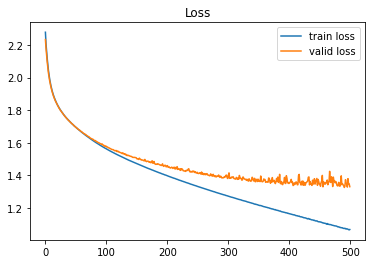

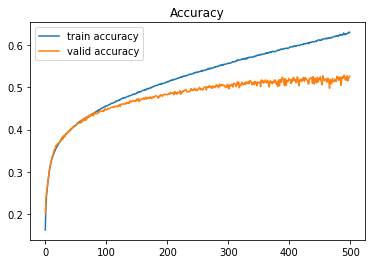

In [7]:
import matplotlib.pyplot as plt
# 以視覺畫方式檢視訓練過程

train_loss = model.history.history["loss"]
valid_loss = model.history.history["val_loss"]

train_acc = model.history.history["accuracy"]
valid_acc = model.history.history["val_accuracy"]

plt.plot(range(len(train_loss)), train_loss, label="train loss")
plt.plot(range(len(valid_loss)), valid_loss, label="valid loss")
plt.legend()
plt.title("Loss")
plt.show()

plt.plot(range(len(train_acc)), train_acc, label="train accuracy")
plt.plot(range(len(valid_acc)), valid_acc, label="valid accuracy")
plt.legend()
plt.title("Accuracy")
plt.show()